In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision
import numpy as np
from scipy.spatial.distance import cdist

In [3]:
# Training Images

import os
root = 'data_faces/img_align_celeba'
timg_list = os.listdir(root)
print(len(timg_list))

202599


In [4]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
import PIL.Image as Image
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
""" data """
crop_size = 108
re_size = 32
offset_height = (218 - crop_size) // 2
offset_width = (178 - crop_size) // 2
crop = lambda x: x[:, offset_height:offset_height + crop_size, offset_width:offset_width + crop_size]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Lambda(crop),
     transforms.ToPILImage(),
     transforms.Scale(size=(re_size, re_size), interpolation=Image.BICUBIC),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])

batch_size = 64


# Transformed Training Images
celeba_data = datasets.ImageFolder('./data_faces', transform=transform)

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [5]:
# Generated Images

import os
root = 'sep_images_folder/sep_imgs'
gimg_list = os.listdir(root)
print(len(gimg_list))

6400


In [6]:
generated_transform = transforms.Compose([transforms.ToTensor()])

generated_celeb_data = datasets.ImageFolder('./sep_images_folder', transform = generated_transform)
print(generated_celeb_data)

Dataset ImageFolder
    Number of datapoints: 6400
    Root location: ./sep_images_folder
    StandardTransform
Transform: Compose(
               ToTensor()
           )


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


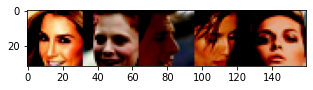

In [7]:
# Training Images

# Let's display some of the training samples.
sample_images = []
celeba_data_iter = iter(celeba_data) 
for _ in range(5):
  sample = next(celeba_data_iter)    
  print(sample[0].shape)
  sample_images.append(np.transpose(sample[0].data.cpu().numpy(), (1,2,0)))

fig = plt.figure(figsize = (5, 25))   
ax1 = plt.subplot(111)
ax1.imshow(np.concatenate(sample_images, axis=1), cmap='gray')
plt.show()


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


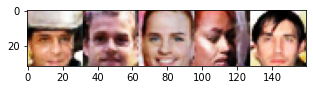

In [8]:
# Generated Images
sample_images = []
celeb_gen_data_iter = iter(generated_celeb_data)
for _ in range(5):
  sample = next(celeb_gen_data_iter)
  print(sample[0].shape)
  sample_images.append(np.transpose(sample[0].data.cpu().numpy(), (1,2,0)))

fig = plt.figure(figsize = (5, 25))   
ax1 = plt.subplot(111)
ax1.imshow(np.concatenate(sample_images, axis=1), cmap='gray')
plt.show()

In [9]:
batch_size = 64
nworkers = 4 

# Dataloaders
training_data_loader = DataLoader(celeba_data, batch_size=batch_size, shuffle=True, num_workers=nworkers)
generated_data_loader = DataLoader(generated_celeb_data, batch_size=batch_size, shuffle=True, num_workers=nworkers)

print(generated_data_loader)

In [ ]:
for batch,_ in generated_data_loader:
    print(batch.shape)
    x = batch.numpy()
    print(x.shape, type(x))
    break

In [10]:
# for img in generated_celeb_data:
generated_celeb_data = np.concatenate([batch.numpy() for batch, _ in generated_data_loader])

In [11]:
generated_celeb_data.shape

(6400, 3, 32, 32)

In [12]:
# Training
celeba_data_list = []
batch_num = 0
for batch,_ in training_data_loader:
    batch_num += 1
    if batch_num == 100:
        break
    celeba_data_list.append(batch.numpy())
    

celeba_data = np.concatenate(celeba_data_list)
# celeba_data = np.concatenate([batch.numpy() for batch,_ in training_data_loader])

In [13]:
celeba_data.shape

(6336, 3, 32, 32)

In [ ]:
generated_celeb_data = generated_celeb_data[:6400,:]
generated_celeb_data.shape

In [14]:
dist = cdist(celeba_data.reshape(celeba_data.shape[0], 32 * 32 * 3), generated_celeb_data.reshape(generated_celeb_data.shape[0], 32 * 32 * 3), 'chebyshev')

In [15]:
print(dist.shape)

(6336, 6400)


In [16]:
min_dis = np.argmin(dist, axis=1)

In [17]:
print(len(min_dis))

6336


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


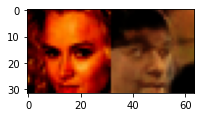

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


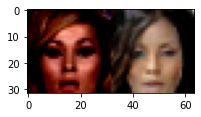

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


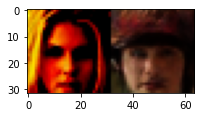

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


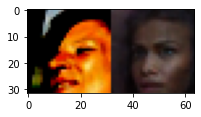

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


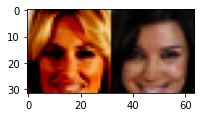

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


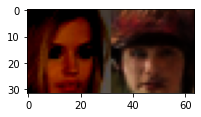

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


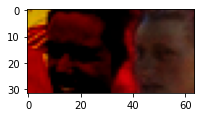

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


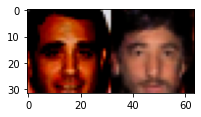

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


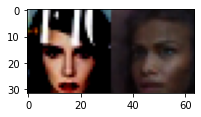

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


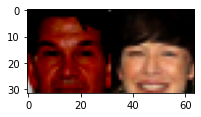

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


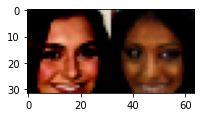

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


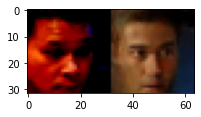

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


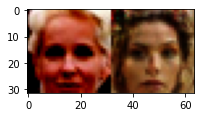

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


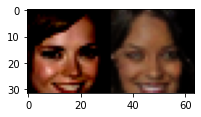

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


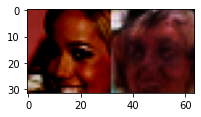

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


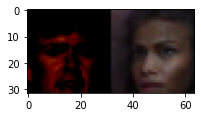

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


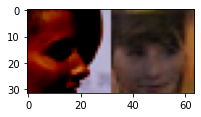

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


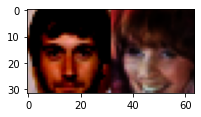

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


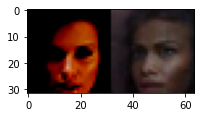

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


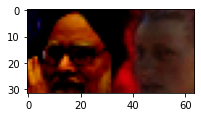

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


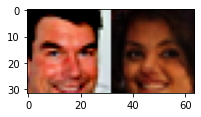

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


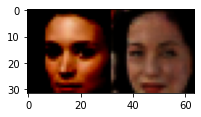

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


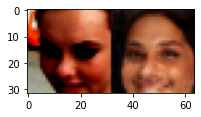

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


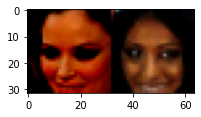

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


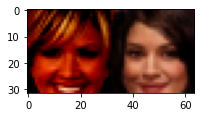

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


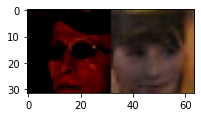

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


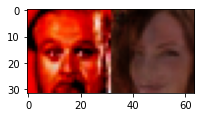

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


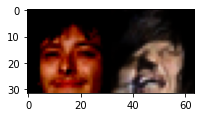

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


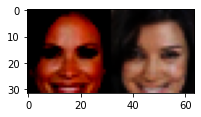

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


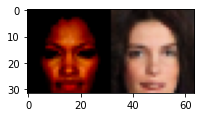

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


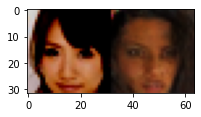

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


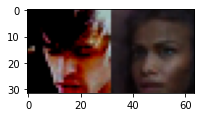

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


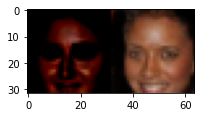

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


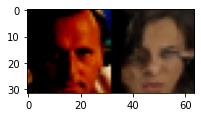

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


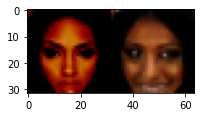

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


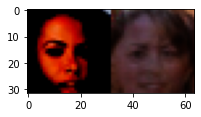

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


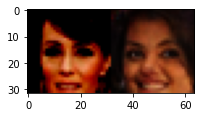

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


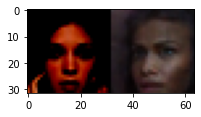

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


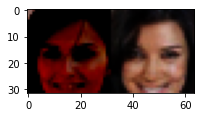

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


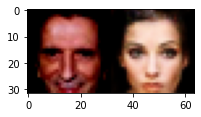

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


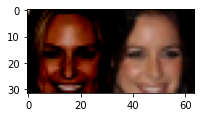

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


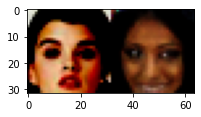

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


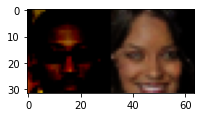

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


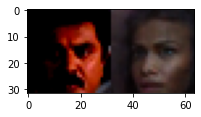

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


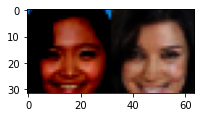

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


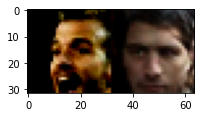

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


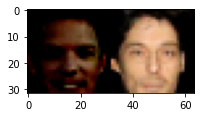

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


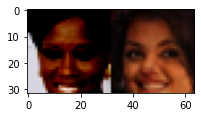

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


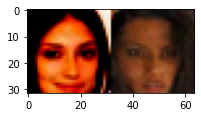

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


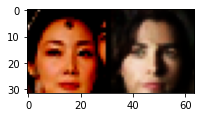

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


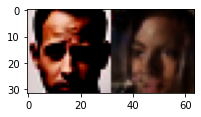

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


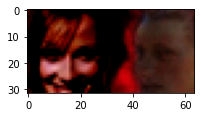

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


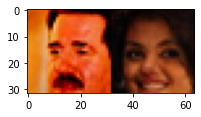

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


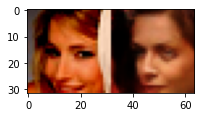

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


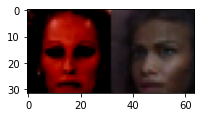

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


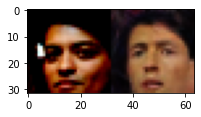

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


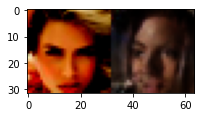

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


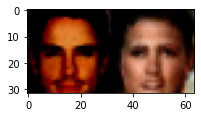

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


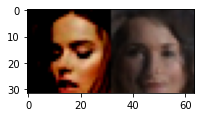

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


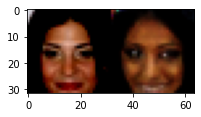

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


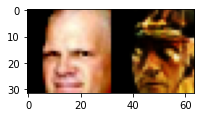

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


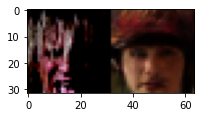

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


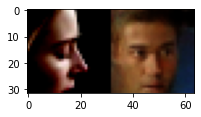

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


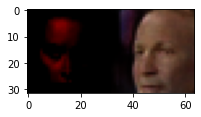

In [20]:
for train_i in range(64):
  train_gen = []
  train_img = celeba_data[train_i] 
  train_gen.append(np.transpose(train_img, (1,2,0)))
  gen_img = generated_celeb_data[min_dis[train_i]]
  train_gen.append(np.transpose(gen_img, (1,2,0)))

  fig = plt.figure(figsize = (3, 3))   
  ax1 = plt.subplot(111)
  ax1.imshow(np.concatenate(train_gen, axis=1))
  plt.show()

In [ ]:
# END OF Nearest Neigbour